<a href="https://colab.research.google.com/github/makkimaki/reinforcement-learning-udemy/blob/main/19_FrozenLake_Policy_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 方策の評価をする
方策の改善は次のノートブックで。

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gymnasium as gym

In [9]:
def policy_evaluation(env, policy, gamma=0.99, theta=1e-6):
    """
    Args:
        env:
        policy:
        gamma:割引率
        theta: 収束を判定する閾値
    """
    nS = env.observation_space.n # 今回は４*４＝16マスがこれ
    V = np.zeros(nS)
    P = env.unwrapped.P

    while True:
        delta = 0
        for s in range(nS):
            v = 0
            for a, action_prob in enumerate(policy[s]): # action_prob = piのこと
                for prob, next_state, reward, done in P[s][a]:
                    v += action_prob * prob * (reward + gamma * V[next_state]) # 期待値の計算
            delta = max(delta, np.abs(v - V[s]))
            V[s] = v
        if delta < theta:
            break
    return V

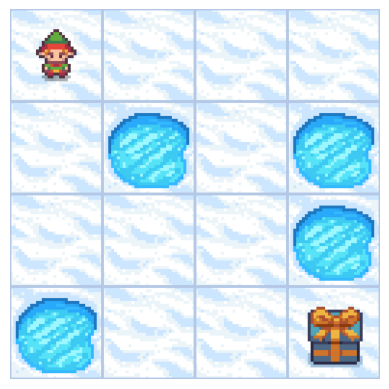

In [10]:
env = gym.make("FrozenLake-v1", is_slippery=False, render_mode="rgb_array")
state, info = env.reset()
frame = env.render()
plt.imshow(frame)
plt.axis("off")
plt.show()

ここからpolicy_evaluation. 価値観数の推定を行う

In [11]:
random_policy = np.ones([env.observation_space.n, env.action_space.n]) / env.action_space.n

In [12]:
# 上下左右のアクションの確率が定義された形が見える。全マス分
random_policy

array([[0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25]])

In [13]:
V = policy_evaluation(env, random_policy, gamma=0.99, theta=1e-6)

In [14]:
V

array([0.01235356, 0.01042298, 0.01933735, 0.00947697, 0.01478582,
       0.        , 0.03889412, 0.        , 0.0326019 , 0.08433739,
       0.13781067, 0.        , 0.        , 0.17034467, 0.43357932,
       0.        ])

<Axes: >

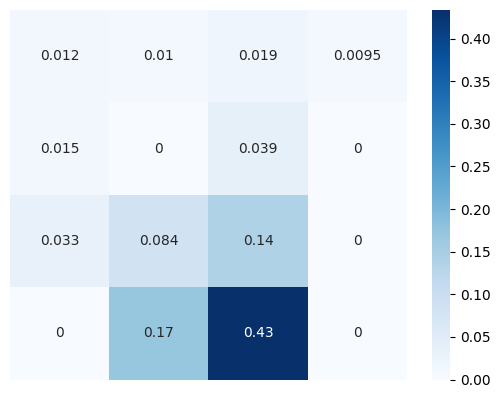

In [15]:
# マップに対する価値関数が表示される
# ゴールでは0となってる！
# ゴール目前は価値が高いことが見える
fig, ax = plt.subplots()
sns.heatmap(
    V.reshape(4, 4),
    ax=ax,
    cmap="Blues",
    linecolor="black",
    xticklabels=[],
    yticklabels=[],
    annot=True
)